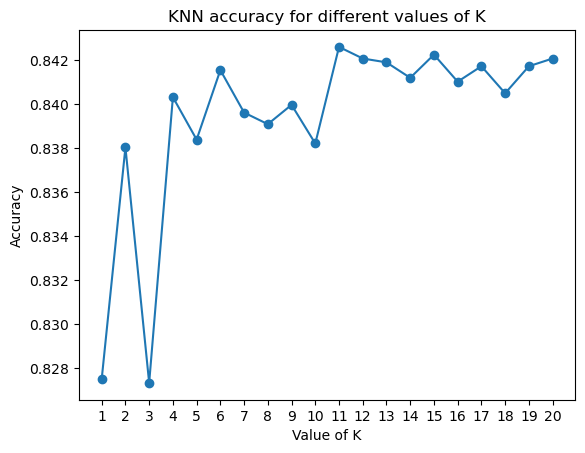

Best value of K: 11
Corresponding accuracy: 0.8426039656080014


In [2]:
#KNN Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

df_unfiltered = pd.read_csv('../../data/processed/credit_risk_dataset_processed.csv')
df = df_unfiltered[df_unfiltered['person_age'] < 100]    
df_encoded = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade'])
X = df_encoded.drop('loan_status', axis=1) 
y = df_encoded['loan_status']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kvalue = range(1,21)
accuracies = []

for k in kvalue:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracies.append(accuracy)

plt.plot(kvalue, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values ​​of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(kvalue)
plt.grid(False)
plt.show()

max_kvalue = kvalue[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f'Best value of K: {max_kvalue}')
print(f'Corresponding accuracy: {best_accuracy}')